# Project 10: Movie recommender system -- Neighborhood-based Collaborative Filtering
Non-Negative Matrix Factorization applied to the dataset ml-latest-small.zip extracted from the website MovieLens (http://movielens.org).

---

## Imports and Loading Data

In [65]:
import pandas as pd
import numpy as np
from scipy.spatial import distance
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
df_ratings = pd.read_csv('data/ratings.csv')
df_ratings

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


In [22]:
df_movies = pd.read_csv('data/movies.csv')
df_movies

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


In [23]:
# Creating a dictionary of the movie titles and id
df_movies.drop(['genres'], axis=1, inplace=True)
movies_dict= dict(df_movies.values)
#movies_dict

## User-movie matrix

In [24]:
df_ratings.drop('timestamp', axis=1, inplace=True)
R=df_ratings

In [25]:
R.isnull().sum() #no missing values

userId     0
movieId    0
rating     0
dtype: int64

In [26]:
len(R)

100836

In [27]:
R_wide = pd.pivot_table(R, values='rating', index=['userId'], columns= ['movieId'])

In [28]:
R_wide

movieId,1,2,3,4,5,6,7,8,9,10,...,193565,193567,193571,193573,193579,193581,193583,193585,193587,193609
userId,,,,,,,,,,,,,,,,,,,,,
1,4.0,NaN,4.0,NaN,NaN,4.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,2.5,NaN,NaN,NaN,NaN,NaN,2.5,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
607,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
608,2.5,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
R_wide.isnull().sum() #several missing values

movieId
1         395
2         500
3         558
4         603
5         561
         ... 
193581    609
193583    609
193585    609
193587    609
193609    609
Length: 9724, dtype: int64

In [30]:
R_wide.shape

(610, 9724)

In [31]:
R_wide = R_wide.fillna(0)

In [32]:
R_wide

movieId,1,2,3,4,5,6,7,8,9,10,...,193565,193567,193571,193573,193579,193581,193583,193585,193587,193609
userId,,,,,,,,,,,,,,,,,,,,,
1,4.0,0.0,4.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,2.5,0.0,0.0,0.0,0.0,0.0,2.5,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
607,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
608,2.5,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Cosine similarity

In [34]:
def cosin_sim(x, y):
   num = np.sum(x*y)
   xsum = np.sqrt(np.sum(x*x))
   ysum = np.sqrt(np.sum(y*y))
   return num/(xsum*ysum)

In [35]:
#Testing that the fucntion cosin_sim is correct
x = np.array([2, 1, 1, 1, 1])
y = np.array([5, 4, 5, 4, 4])

solution = 1-distance.cosine(x, y)

print(cosin_sim(x, y))

assert np.round(cosin_sim(x, y), 2) == np.round(solution, 2)

0.9642857142857142


In [36]:
x1 = np.array([1, 1, 1])
y1 = np.array([1, 1, 1])
print(cosin_sim(x1, y1))

1.0000000000000002


## User-based filtering

In [39]:
#One example
R_wide.index
cosin_sim(R_wide[1], R_wide[5])

0.3087622953568329

### user-user similarity matrix

In [73]:
R_wt = R_wide.T
R_wt

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
movieId,,,,,,,,,,,,,,,,,,,,,
1,4.0,0.0,0.0,0.0,4.0,0.0,4.5,0.0,0.0,0.0,...,4.0,0.0,4.0,3.0,4.0,2.5,4.0,2.5,3.0,5.0
2,0.0,0.0,0.0,0.0,0.0,4.0,0.0,4.0,0.0,0.0,...,0.0,4.0,0.0,5.0,3.5,0.0,0.0,2.0,0.0,0.0
3,4.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193581,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
193583,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
193585,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [58]:
user_lst = R_wt.columns

In [59]:
print(user_lst)

Int64Index([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,
            ...
            601, 602, 603, 604, 605, 606, 607, 608, 609, 610],
           dtype='int64', name='userId', length=610)


In [61]:
sim_lst = []

for user1 in R_wt.columns:
    sim_row = []
    for user2 in R_wt.columns:
        sim_row.append(cosin_sim(R_wt[user1], R_wt[user2]))
    sim_lst.append(sim_row)
        

In [62]:
sim_df=pd.DataFrame(sim_lst,columns=R_wt.columns, index=R_wt.columns).round(3)

In [109]:
sim_df

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
userId,,,,,,,,,,,,,,,,,,,,,
1,1.000,0.027,0.060,0.194,0.129,0.128,0.159,0.137,0.064,0.017,...,0.081,0.164,0.221,0.071,0.154,0.164,0.269,0.291,0.094,0.145
2,0.027,1.000,0.000,0.004,0.017,0.025,0.028,0.027,0.000,0.067,...,0.203,0.017,0.012,0.000,0.000,0.028,0.013,0.046,0.028,0.102
3,0.060,0.000,1.000,0.002,0.005,0.004,0.000,0.005,0.000,0.000,...,0.005,0.005,0.025,0.000,0.011,0.013,0.019,0.021,0.000,0.032
4,0.194,0.004,0.002,1.000,0.129,0.088,0.115,0.063,0.011,0.031,...,0.086,0.128,0.308,0.053,0.085,0.200,0.132,0.150,0.032,0.108
5,0.129,0.017,0.005,0.129,1.000,0.300,0.108,0.429,0.000,0.031,...,0.068,0.419,0.110,0.259,0.149,0.106,0.153,0.136,0.261,0.061
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,0.164,0.028,0.013,0.200,0.106,0.102,0.200,0.099,0.076,0.089,...,0.178,0.117,0.301,0.066,0.148,1.000,0.153,0.263,0.070,0.201
607,0.269,0.013,0.019,0.132,0.153,0.162,0.186,0.185,0.012,0.010,...,0.093,0.200,0.204,0.138,0.119,0.153,1.000,0.283,0.149,0.139
608,0.291,0.046,0.021,0.150,0.136,0.179,0.324,0.187,0.100,0.077,...,0.158,0.198,0.233,0.155,0.178,0.263,0.283,1.000,0.122,0.322


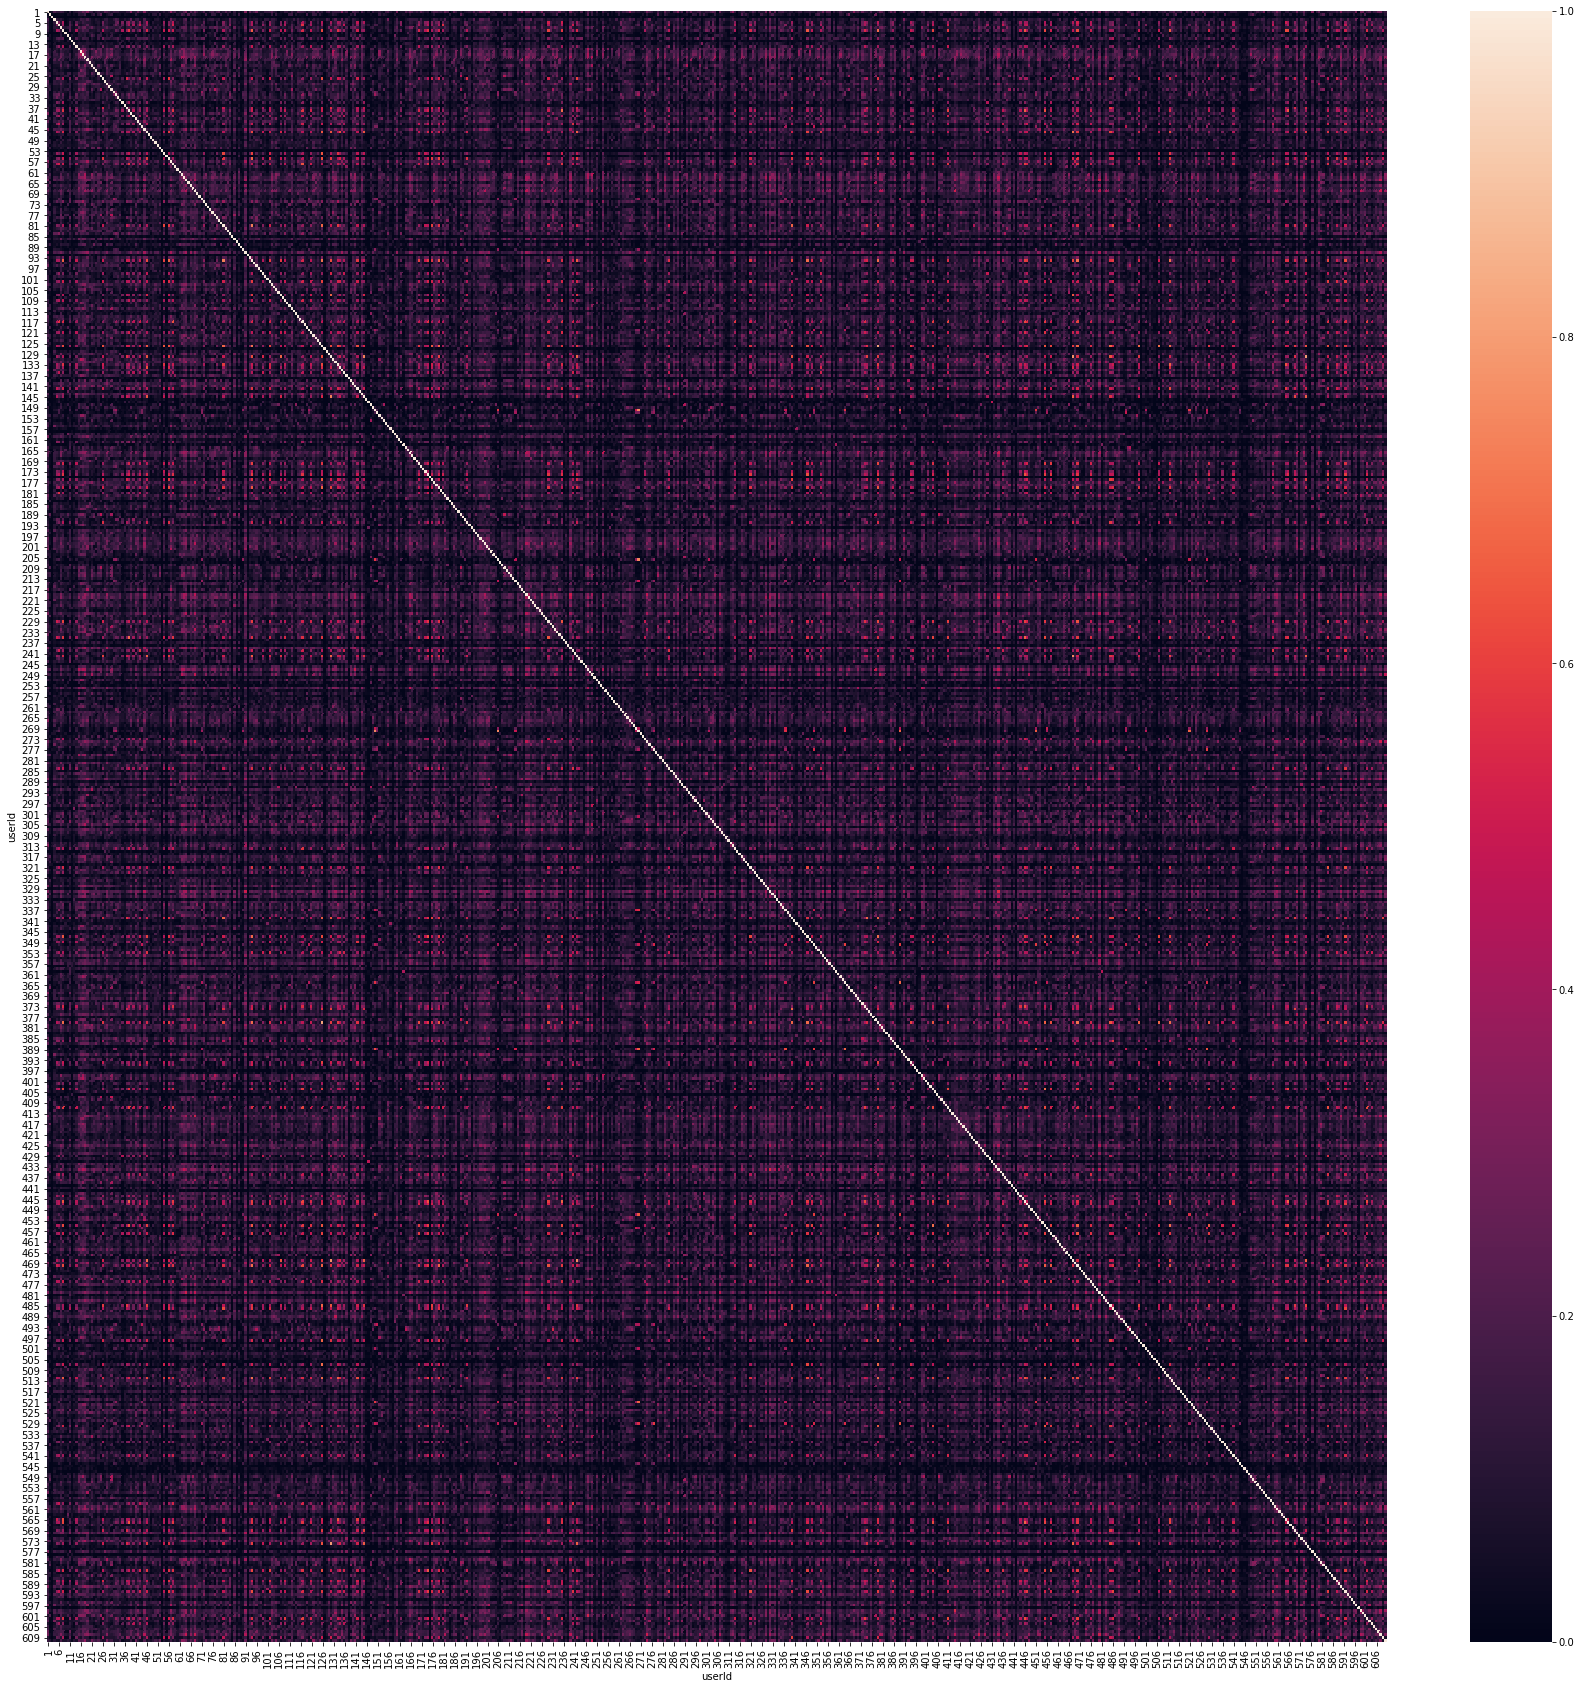

In [67]:
plt.figure(figsize=(30,30))
sns.heatmap(sim_df);

In [74]:
# Sample prediction for user=100

In [102]:
selected_user = 5

In [111]:
unseen_movies = np.array(R_wt[R_wt[selected_user]==0.0].index)

In [112]:
unseen_movies

array([     2,      3,      4, ..., 193585, 193587, 193609])

In [115]:
predicted_ratings = np.empty([1,2])
predicted_ratings

array([[9.09e-322, 2.96e-321]])

In [105]:
for movie in unseen_movies:
    other_users = R_wt.columns[R_wt.loc[movie] != 0]
    numerator = 0.000001
    denominator = 0.000001
    for user in other_users:
        numerator += cosin_sim(R_wt[selected_user], R_wt[user])*R_wt.loc[movie][user]
        denominator += cosin_sim(R_wt[selected_user], R_wt[user])
    predicted_ratings.append((movie, numerator/denominator))

In [116]:
other_users

Int64Index([331], dtype='int64', name='userId')

In [106]:
ratings_pred = sorted(predicted_ratings, key=lambda x: x[1], reverse=True)

In [107]:
ratings_pred[0:5]

[(99, 4.9999890428617),
 (148, 4.999984308253844),
 (496, 4.999984308253844),
 (1151, 4.999984208509867),
 (6442, 4.99998372022885)]

In [108]:
user_rec = {}
for tup in ratings_pred[0:5]:
    user_rec.update({movies_dict[tup[0]]:round(tup[1],0)})

print(user_rec)

{'Heidi Fleiss: Hollywood Madam (1995)': 5.0, 'Awfully Big Adventure, An (1995)': 5.0, 'What Happened Was... (1994)': 5.0, 'Lesson Faust (1994)': 5.0, 'Belle époque (1992)': 5.0}
